In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib

/home/blannon/.virtualenvs/san/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [3]:
matplotlib.use('svg')

/home/blannon/.virtualenvs/san/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
import os
import json
from glob import glob

In [5]:
import re
import random
import itertools

In [6]:
import sys

sys.path.append(os.path.join(os.getcwd(), os.pardir))

import settings

In [7]:
tree_data = json.load(open(os.path.join(settings.PROJ_ROOT,'cluster_viz','tree_data','MASTER.json')))

In [8]:
import sh

# Connect to ES

In [1]:
from elasticsearch import Elasticsearch

In [2]:
es = Elasticsearch(['localhost:9201',])

In [3]:
print es.cat.indices()

green fcc_test_2              1 0     103 0 626.4kb 626.4kb 
green fcc_comments_part_two   1 0 1674385 0   5.6gb   5.6gb 
green test                    1 0       1 0   9.6kb   9.6kb 
green fcc_comments_part_three 1 0 2562973 0   9.6gb   9.6gb 



# Find common fields

In [10]:
field_counts = {                                
  "viewingStatus": 1461230,      
  "fileNumber": 1343094,         
  "email_subject": 1236875,      
  "dateReplyComment": 1,         
  "preprocessed": 1461230,       
  "modified": 1461230,           
  "disseminated": 1461230,       
  "applicant": 2475344,          
  "submissionType": 1461230,     
  "zip": 1461230,                
  "pages": 1461230,              
  "proceeding": 1461230,         
  "city": 1461230,               
  "id": 2475344,                 
  "smallBusinessImpact": 1461230,
  "stateCd": 1461230,            
  "text": 2475344,               
  "exParte": 1461230,            
  "tagged": 2475344,             
  "regFlexAnalysis": 1461230,    
  "author": 1343094,             
  "brief": 1461230,              
  "daNumber": 3,                 
  "lawfirm": 1343094,            
  "reportNumber": 29,            
  "email_to": 222761,            
  "dateRcpt": 2475344            
}                                

In [11]:
field_count_df = pd.DataFrame.from_dict(field_counts, orient='index')
field_count_df.columns = ['count',]

In [12]:
field_count_df.sort('count', ascending=False)

,count
tagged,2475344
text,2475344
id,2475344
applicant,2475344
dateRcpt,2475344
exParte,1461230
preprocessed,1461230
modified,1461230
disseminated,1461230
submissionType,1461230


In [13]:
in_all_docs = list(field_count_df[field_count_df['count'] == 2475344].index)

In [14]:
dict.fromkeys(in_all_docs)

{'applicant': None, 'dateRcpt': None, 'id': None, 'tagged': None, 'text': None}

# Reading all docs

In [18]:
doc_ids = (line.strip() for line in open(os.path.join(settings.PERSIST_DIR, 'document_index_part_two')))

In [443]:
def get_json_doc(doc_id):
    with open(os.path.join(settings.PROC_DIR,'{}.json'.format(doc_id))) as fin:
        jd = json.load(fin)
    return jd

In [20]:
doc_eg = get_json_doc('02-008-011931')
doc_eg

{u'applicant': u'cate andrews',
 u'dateRcpt': u'2014-08-06T16:01:28+00:00',
 u'email_subject': u'Hold public field hearings on net neutrality',
 u'id': u'02-008-011931',
 u'tagged': u'To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler and|CC|and the|DT|the FCC|NP|fcc To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler --|:|-- I|PP|i urge|VVP|urge you|PP|you to|TO|to schedule|VV|schedule a|DT|a series|NN|series of|IN|of large|JJ|large ,|,|, open|JJ|open public|JJ|public hearings|NNS|hearing around|IN|around the|DT|the country|NN|country to|TO|to hear|VV|hear the|DT|the concerns|NNS|concern of|IN|of the|DT|the people|NNS|person about|IN|about your|PP$|your net|JJ|net neutrality|NN|neutrality plan|NN|plan .|SENT|. I|PP|i urge|VVP|urge you|PP|you to|TO|to protect|VV|protect an|DT|a open|JJ|open internet|NN|internet by|IN|by building|VVG|build a|DT|a solid|JJ|solid legal|JJ|legal argument|NN|argument for|IN|for net|JJ|net neutrality|NN|neutrality using|VVG|use Title|NP|titl

In [21]:
doc_eg.update({'clusters': []})

In [22]:
doc_eg

{u'applicant': u'cate andrews',
 'clusters': [],
 u'dateRcpt': u'2014-08-06T16:01:28+00:00',
 u'email_subject': u'Hold public field hearings on net neutrality',
 u'id': u'02-008-011931',
 u'tagged': u'To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler and|CC|and the|DT|the FCC|NP|fcc To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler --|:|-- I|PP|i urge|VVP|urge you|PP|you to|TO|to schedule|VV|schedule a|DT|a series|NN|series of|IN|of large|JJ|large ,|,|, open|JJ|open public|JJ|public hearings|NNS|hearing around|IN|around the|DT|the country|NN|country to|TO|to hear|VV|hear the|DT|the concerns|NNS|concern of|IN|of the|DT|the people|NNS|person about|IN|about your|PP$|your net|JJ|net neutrality|NN|neutrality plan|NN|plan .|SENT|. I|PP|i urge|VVP|urge you|PP|you to|TO|to protect|VV|protect an|DT|a open|JJ|open internet|NN|internet by|IN|by building|VVG|build a|DT|a solid|JJ|solid legal|JJ|legal argument|NN|argument for|IN|for net|JJ|net neutrality|NN|neutrality using|VVG|

# Indexing

In [163]:
mapping = json.load(open(os.path.join(settings.STATS_DIR,'es_mapping_part_two.json')))
mapping

{u'mappings': {u'comment': {u'properties': {u'applicant': {u'index': u'not_analyzed',
     u'type': u'string'},
    u'author': {u'index': u'not_analyzed', u'type': u'string'},
    u'brief': {u'type': u'boolean'},
    u'city': {u'index': u'not_analyzed', u'type': u'string'},
    u'clusters': {u'index': u'not_analyzed', u'type': u'string'},
    u'daNumber': {u'index': u'not_analyzed', u'type': u'string'},
    u'dateRcpt': {u'format': u'dateOptionalTime', u'type': u'date'},
    u'dateReplyComment': {u'format': u'dateOptionalTime', u'type': u'date'},
    u'disseminated': {u'format': u'dateOptionalTime', u'type': u'date'},
    u'email_subject': {u'type': u'string'},
    u'email_to': {u'index': u'not_analyzed', u'type': u'string'},
    u'exParte': {u'type': u'boolean'},
    u'fileNumber': {u'index': u'not_analyzed', u'type': u'string'},
    u'id': {u'index': u'not_analyzed', u'type': u'string'},
    u'lawfirm': {u'index': u'not_analyzed', u'type': u'string'},
    u'modified': {u'format': u'd

In [164]:
es.indices.create(index='fcc_comments_part_two', body=mapping)

{u'acknowledged': True}

In [165]:
es.indices.delete(index='fcc_comments_part_two')

{u'acknowledged': True}

In [23]:
es.index(index='fcc_test', doc_type='comment', body=doc_eg, id=doc_eg['id'])

{u'_id': u'02-008-011931',
 u'_index': u'fcc_test',
 u'_type': u'comment',
 u'_version': 1,
 u'created': True}

In [24]:
es.get(index='fcc_test', doc_type='comment', id='02-008-011931')

{u'_id': u'02-008-011931',
 u'_index': u'fcc_test',
 u'_source': {u'applicant': u'cate andrews',
  u'clusters': [],
  u'dateRcpt': u'2014-08-06T16:01:28+00:00',
  u'email_subject': u'Hold public field hearings on net neutrality',
  u'id': u'02-008-011931',
  u'tagged': u'To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler and|CC|and the|DT|the FCC|NP|fcc To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler --|:|-- I|PP|i urge|VVP|urge you|PP|you to|TO|to schedule|VV|schedule a|DT|a series|NN|series of|IN|of large|JJ|large ,|,|, open|JJ|open public|JJ|public hearings|NNS|hearing around|IN|around the|DT|the country|NN|country to|TO|to hear|VV|hear the|DT|the concerns|NNS|concern of|IN|of the|DT|the people|NNS|person about|IN|about your|PP$|your net|JJ|net neutrality|NN|neutrality plan|NN|plan .|SENT|. I|PP|i urge|VVP|urge you|PP|you to|TO|to protect|VV|protect an|DT|a open|JJ|open internet|NN|internet by|IN|by building|VVG|build a|DT|a solid|JJ|solid legal|JJ|legal argumen

In [25]:
es.get(index='fcc_test', doc_type='comment', id='02-008-011931', fields=['id','clusters','dateRcpt','text'])

{u'_id': u'02-008-011931',
 u'_index': u'fcc_test',
 u'_type': u'comment',
 u'_version': 1,
 u'fields': {u'dateRcpt': [u'2014-08-06T16:01:28+00:00'],
  u'id': [u'02-008-011931'],
  u'text': [u'\nTo Chairman Tom Wheeler and the FCC Commissioners&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;\n\nTo Chairman Tom Wheeler--\n\nI urge you to schedule a series of large, open public hearings around the country to hear the concerns of the people about your net neutrality plan. \nI urge you to protect an open internet by building a solid legal argument for net neutrality using Title II of the Telecommunications act which would declare the internet an essential service as a public utility.\n\nThank you, \n\n\ncate andrews\n\n 98239\n']},
 u'found': True}

In [26]:
es.update(index='fcc_test', doc_type='comment', id='02-008-011931', 
          body={
    "script" : "cluster_add",
    "params" : {
        "new_clusters" : ['a','b']
    }
})

{u'_id': u'02-008-011931',
 u'_index': u'fcc_test',
 u'_type': u'comment',
 u'_version': 2}

In [27]:
es.get(index='fcc_test', doc_type='comment', id='02-008-011931', fields=['id','clusters','dateRcpt','text'])

{u'_id': u'02-008-011931',
 u'_index': u'fcc_test',
 u'_type': u'comment',
 u'_version': 2,
 u'fields': {u'clusters': [u'a', u'b'],
  u'dateRcpt': [u'2014-08-06T16:01:28+00:00'],
  u'id': [u'02-008-011931'],
  u'text': [u'\nTo Chairman Tom Wheeler and the FCC Commissioners&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;&acirc;&euro;&ldquo;\n\nTo Chairman Tom Wheeler--\n\nI urge you to schedule a series of large, open public hearings around the country to hear the concerns of the people about your net neutrality plan. \nI urge you to protect an open internet by building a solid legal argument for net neutrality using Title II of the Telecommunications act which would declare the internet an essential service as a public utility.\n\nThank you, \n\n\ncate andrews\n\n 98239\n']},
 u'found': True}

In [28]:
res = es.search(index='fcc_test',
          doc_type='comment',
          body={"query": {"match":{"text": "chairman tom wheeler"}}})

In [29]:
print json.dumps(res, indent=2)

{
  "hits": {
    "hits": [
      {
        "_score": 0.07046558, 
        "_type": "comment", 
        "_id": "02-008-011931", 
        "_source": {
          "tagged": "To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler and|CC|and the|DT|the FCC|NP|fcc To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler --|:|-- I|PP|i urge|VVP|urge you|PP|you to|TO|to schedule|VV|schedule a|DT|a series|NN|series of|IN|of large|JJ|large ,|,|, open|JJ|open public|JJ|public hearings|NNS|hearing around|IN|around the|DT|the country|NN|country to|TO|to hear|VV|hear the|DT|the concerns|NNS|concern of|IN|of the|DT|the people|NNS|person about|IN|about your|PP$|your net|JJ|net neutrality|NN|neutrality plan|NN|plan .|SENT|. I|PP|i urge|VVP|urge you|PP|you to|TO|to protect|VV|protect an|DT|a open|JJ|open internet|NN|internet by|IN|by building|VVG|build a|DT|a solid|JJ|solid legal|JJ|legal argument|NN|argument for|IN|for net|JJ|net neutrality|NN|neutrality using|VVG|use Title|NP|title II|NP|ii of

# Bulk indexing

In [33]:
proc_docs = [os.path.basename(fn).replace('.json','') for fn in glob(os.path.join(settings.PROC_DIR,'*.json'))]

In [34]:
proc_docs

['02-024-006416',
 '02-124-007879',
 '02-039-004406',
 '02-130-000240',
 '02-054-001818',
 '6018604472',
 '02-028-000537',
 '6018490566',
 '02-122-004521',
 '02-010-005096',
 '02-070-004446',
 '60000830663',
 '02-122-006243',
 '6018657944',
 '02-059-001952',
 '02-123-001905',
 '02-051-001988',
 '02-064-005065',
 '02-135-000652',
 '02-138-003831',
 '6018823795',
 '02-084-003005',
 '02-070-001990',
 '02-032-002405',
 '02-031-003536',
 '02-093-000025',
 '60000831044',
 '6018916507',
 '02-060-002096',
 '02-029-007109',
 '02-047-006454',
 '02-074-004436',
 '6018577934',
 '02-011-003145',
 '02-034-002996',
 '02-023-004948',
 '02-048-004565',
 '02-132-001669',
 '02-039-003413',
 '02-076-004191',
 '02-084-001362',
 '02-080-004393',
 '02-046-004859',
 '02-009-017924',
 '02-145-000446',
 '02-081-000599',
 '02-041-007014',
 '02-131-004815',
 '02-111-000484',
 '02-014-005922',
 '02-054-000830',
 '02-043-008588',
 '02-028-006878',
 '6018561321',
 '6018651015',
 '6018567546',
 '02-066-000857',
 '02-

In [46]:
action_template = {'_index': 'fcc_test',
                   '_type': 'comment',
                   '_id': None,
                   '_source': None}

def build_es_action(doc_id):
    d = get_json_doc(doc_id)
    d['clusters'] = []
    source = action_template.copy()
    source['_id'] = doc_id
    source['_source'] = d
    return source

In [36]:
from elasticsearch import helpers

In [47]:
sb = helpers.streaming_bulk(es,
                            (build_es_action(doc_id) for doc_id in proc_docs))

In [48]:
returns = [r for r in sb]

In [51]:
returns[0]

(True,
 {u'index': {u'_id': u'02-024-006416',
   u'_index': u'fcc_test',
   u'_type': u'comment',
   u'_version': 1,
   u'status': 201}})

In [66]:
es.indices.stats(index="fcc_test")

{u'_all': {u'primaries': {u'completion': {u'size_in_bytes': 0},
   u'docs': {u'count': 103, u'deleted': 0},
   u'fielddata': {u'evictions': 0, u'memory_size_in_bytes': 0},
   u'filter_cache': {u'evictions': 0, u'memory_size_in_bytes': 0},
   u'flush': {u'total': 0, u'total_time_in_millis': 0},
   u'get': {u'current': 0,
    u'exists_time_in_millis': 0,
    u'exists_total': 0,
    u'missing_time_in_millis': 0,
    u'missing_total': 0,
    u'time_in_millis': 0,
    u'total': 0},
   u'id_cache': {u'memory_size_in_bytes': 0},
   u'indexing': {u'delete_current': 0,
    u'delete_time_in_millis': 0,
    u'delete_total': 0,
    u'index_current': 0,
    u'index_time_in_millis': 154,
    u'index_total': 103},
   u'merges': {u'current': 0,
    u'current_docs': 0,
    u'current_size_in_bytes': 0,
    u'total': 0,
    u'total_docs': 0,
    u'total_size_in_bytes': 0,
    u'total_time_in_millis': 0},
   u'percolate': {u'current': 0,
    u'memory_size': u'-1b',
    u'memory_size_in_bytes': -1,
    u'q

In [93]:
es.get(index='fcc_test', doc_type='comment', id='02-016-003522')

{u'_id': u'02-016-003522',
 u'_index': u'fcc_test',
 u'_source': {u'applicant': u'',
  u'clusters': [u'0_0', u'2_0-1-2', u'3_0-1-2-1', u'1_0-1'],
  u'dateRcpt': u'2014-08-29T11:10:30+00:00',
  u'email_subject': u'Open Internet Reply Comment',
  u'id': u'02-016-003522',
  u'tagged': u'Name|NN|name :|:|: Keith|NP|keith E|NP|e Krauland|NP|krauland Email|NP|email :|:|: xxxx@xxxx.xxx|CD|xxxx@xxxx.xxx Address|NP|address :|:|: 813|CD|813 Oak|NP|oak Street|NP|street Zip|NP|zip :|:|: 29205|CD|29205 Dear|NP|dear Chairman|NP|chairman Wheeler|NP|wheeler ,|,|, please|UH|please don|VV|don t|NN|t break|NN|break the|DT|the Internet|NP|internet .|SENT|. Don|NP|don t|NN|t abandon|NN|abandon the|DT|the Hands|NP|hand off|IN|off the|DT|the approach|NN|approach begun|VVN|begin under|IN|under President|NP|president Clinton|NP|clinton ,|,|, which|WDT|which unleashed|VVD|unleash staggering|JJ|stagger innovation|NN|innovation .|SENT|. That|DT|that bipartisan|JJ|bipartisan approach|NN|approach made|VVD|make poss

In [85]:
result = es.search(index='fcc_test', body={"query": {"match":
                                   {"applicant": {
                                    "query": "google inc",
                                    "operator": "and"}}}})

In [86]:
[h['_source']['applicant'] for h in result['hits']['hits']]

[u'Google Inc.']

In [87]:
result['hits']['hits'][0]

{u'_id': u'02-025-000230',
 u'_index': u'fcc_test',
 u'_score': 11.158178,
 u'_source': {u'applicant': u'Google Inc.',
  u'clusters': [],
  u'dateRcpt': u'2014-09-07T00:00:00+00:00',
  u'email_subject': u'CONGRATULATIONS!!! Your E-MAIL - xxxx@xxxx',
  u'id': u'02-025-000230',
  u'tagged': u'.xxx|CD|.xxx -|:|- Just|RB|just WonCongratulations!!|NP|woncongratulations!! !|SENT|! 2014|CD|2014 We|PP|we are|VBP|be pleased|VVN|please to|TO|to inform|VV|inform you|PP|you that|IN|that your|PP$|your email|NN|email address|NN|address -|:|- xxxx@xxxx.xxx|CD|xxxx@xxxx.xxx -|:|- has|VHZ|have won|VVN|win you|PP|you a|DT|a cash|NN|cash prize|NN|prize in|IN|in the|DT|the 2014|CD|2014 batch|NN|batch of|IN|of Google|NP|google Anniversary|NP|anniversary .|SENT|. Please|UH|please ,|,|, view|NN|view attachment|NN|attachment for|IN|for further|JJ|further details|NNS|detail .|SENT|. Max|NP|max Hopkins|NP|hopkins Information|NP|information Officer|NP|officer Google|NP|google Inc.|NP|inc. United|NP|unite Kingdom

# Updating with cluster membership

In [15]:
tree_data.keys()[:10]

[u'7_1-0-3-2-1-3-2-3',
 u'5_1-0-3-2-1-3',
 u'5_1-0-3-2-1-2',
 u'5_1-0-3-2-1-1',
 u'5_1-0-3-2-1-0',
 u'5_1-0-3-2-0-2',
 u'5_1-0-3-2-0-3',
 u'5_1-0-3-2-0-0',
 u'5_1-0-3-2-0-1',
 u'3_1-0-1-3']

In [16]:
from collections import defaultdict

In [17]:
doc_to_nodes = defaultdict(list)

In [18]:
for node_id,docs in tree_data.iteritems():
    for doc in docs:
        doc_to_nodes[doc].append(node_id)

In [19]:
len(doc_to_nodes.keys())

1674385

In [19]:
es.search(index="fcc_comments_part_two"

In [20]:
tree_data.values()[:10]

[[u'02-025-004797',
  u'02-025-004831',
  u'02-025-004843',
  u'02-025-004949',
  u'02-025-004981',
  u'02-025-005002',
  u'02-025-005044',
  u'02-025-005164',
  u'02-025-005175',
  u'02-025-005178',
  u'02-025-005256',
  u'02-025-005262',
  u'02-025-005289',
  u'02-025-005323',
  u'02-025-005333',
  u'02-025-005359',
  u'02-025-005363',
  u'02-025-005424',
  u'02-025-005469',
  u'02-025-005483',
  u'02-025-005485',
  u'02-025-005502',
  u'02-025-005528',
  u'02-025-005622',
  u'02-025-005651',
  u'02-025-005670',
  u'02-025-005681',
  u'02-025-005687',
  u'02-025-005704',
  u'02-025-005948',
  u'02-025-005958',
  u'02-025-006006',
  u'02-025-006059',
  u'02-025-006147',
  u'02-025-006209',
  u'02-025-006295',
  u'02-025-006542',
  u'02-025-006556',
  u'02-025-006565',
  u'02-025-006634',
  u'02-025-006725',
  u'02-025-006760',
  u'02-025-006777',
  u'02-025-006778',
  u'02-025-006787',
  u'02-025-006814',
  u'02-025-006910',
  u'02-025-007040',
  u'02-025-007052',
  u'02-025-007141',


# Node stats

In [267]:
node_key_phrases = {
 '0_0': 'We are writing to urge you to implement strong and unambiguous net neutrality rules',
 '1_1-1': 'Since the internet became an everyday usable resource',
 '1_1-3': 'The ideological leader of the angry liberals',
 '2_1-0-0': 'The Internet is not broken, and does not need to be fixed',
 '2_1-0-2': 'Of the million or so comments',
 '3_1-0-1-0': 'The Internet has succeeded because it has always been open',
 '3_1-0-1-2': 'as a sierrarise supporter',
 '3_1-0-1-3': 'urge you to schedule a series of large, open public hearings',
 '3_1-0-3-0': 'Reducing the Internet to a public utility is known on Wall Street',
 '3_1-0-3-1': 'At every turn, the Congress and the Courts have told',
 '4_1-0-1-1-1': 'First amendment of the Internet',
 '4_1-0-1-1-3': 'Internet user who believes strongly in the importance of a free',
 '4_1-0-3-2-3': 'The internet cannot be governed as a public utility without',
 '4_1-0-3-3-0': 'The FCC is considering monopoly utility regulations on the Internet',
 '4_1-0-3-3-1': 'America has led the world with competitive internet',
 '4_1-0-3-3-2': 'Placing monopoly utility regulations on the competitive services',
 '4_1-0-3-3-3': 'America has led the world with competitive internet',
 '5_1-0-1-1-0-1': 'I was deeply disappointed to hear that the Federal Communications Commission',
 '5_1-0-1-1-0-2': 'No Content Found',
 '5_1-0-1-1-0-3': 'It has been more than five years',
 '5_1-0-1-1-2-0': 'open public field hearings on net neutrality before September',
 '5_1-0-1-1-2-1': 'I support real net neutrality',
 '5_1-0-1-1-2-3': 'open public field hearings on net neutrality before September',
 '5_1-0-3-2-0-0': 'Every infrastructure system in this country',
 '5_1-0-3-2-0-1': 'take much to realize that this debate',
 '5_1-0-3-2-0-2': 'Every infrastructure system in this country',
 '5_1-0-3-2-1-0': 'Regulating the Internet has always been a solution in search of a problem',
 '5_1-0-3-2-1-1': 'The courts have twice struck down',
 '5_1-0-3-2-2-1': 'The American people are watching a Federal Communications Commission',
 '5_1-0-3-2-2-2': 'approach begun under president clinton',
 '5_1-0-3-2-2-3': 'Millions of liberal fools demanding you reduce the Internet',
 '6_1-0-1-1-0-0-1': 'I urge you to schedule large, open public field hearings',
 '6_1-0-1-1-0-0-2': 'The internet has experienced unfettered growth',
 '6_1-0-3-2-1-2-0': 'If the FCC is taking over the Internet to serve President',
 '6_1-0-3-2-1-2-1': 'A small fringe of the extremist left',
 '6_1-0-3-2-1-2-2': 'Regulating the Internet is the first step in regulating the people',
 '6_1-0-3-2-1-2-3': 'Regulating the Internet is the first step in regulating the people',
 '6_1-0-3-2-1-3-1': 'Regulating the Internet would be a job killer',
 '6_1-0-3-2-1-3-3': 'Before our government can handcuff a citizen',
 '6_1-0-3-2-1-3-0': 'The Internet is the biggest economic, intellectual, and artistic success',
 '7_1-0-3-2-1-3-2-0': 'In the 2010 election, all 95 congressional',
 '7_1-0-3-2-1-3-2-2': 'attempts to regulate the Internet have a well-deserved losing record',
 '7_1-0-3-2-1-3-2-3': 'americans have been getting faster and faster',
 '8_1-0-3-2-1-3-2-1-0': 'If the FCC is taking over the Internet to serve President',
 '8_1-0-3-2-1-3-2-1-1': 'As an American Citizen',
 '8_1-0-3-2-1-3-2-1-2': 'take much to realize that this debate',
 '9_1-0-3-2-1-3-2-1-3-1': 'Over the past two decades the internet has flourished'}

In [268]:
# obtained via javascript on compiled page
id_list = ["circle-0_0", "circle-1_1-1", "circle-1_1-2", "circle-1_1-3", "circle-2_1-0-0", "circle-3_1-0-1-0", "circle-6_1-0-1-1-0-0-0", "circle-6_1-0-1-1-0-0-1", "circle-6_1-0-1-1-0-0-2", "circle-6_1-0-1-1-0-0-3", "circle-6_1-0-1-1-0-0-4", "circle-5_1-0-1-1-0-1", "circle-5_1-0-1-1-0-2", "circle-5_1-0-1-1-0-3", "circle-4_1-0-1-1-1", "circle-5_1-0-1-1-2-0", "circle-5_1-0-1-1-2-1", "circle-5_1-0-1-1-2-2", "circle-5_1-0-1-1-2-3", "circle-4_1-0-1-1-3", "circle-3_1-0-1-2", "circle-3_1-0-1-3", "circle-2_1-0-2", "circle-3_1-0-3-0", "circle-3_1-0-3-1", "circle-5_1-0-3-2-0-0", "circle-5_1-0-3-2-0-1", "circle-5_1-0-3-2-0-2", "circle-5_1-0-3-2-0-3", "circle-5_1-0-3-2-1-0", "circle-5_1-0-3-2-1-1", "circle-6_1-0-3-2-1-2-0", "circle-6_1-0-3-2-1-2-1", "circle-6_1-0-3-2-1-2-2", "circle-6_1-0-3-2-1-2-3", "circle-6_1-0-3-2-1-3-0", "circle-6_1-0-3-2-1-3-1", "circle-7_1-0-3-2-1-3-2-0", "circle-8_1-0-3-2-1-3-2-1-0", "circle-8_1-0-3-2-1-3-2-1-1", "circle-8_1-0-3-2-1-3-2-1-2", "circle-9_1-0-3-2-1-3-2-1-3-0", "circle-9_1-0-3-2-1-3-2-1-3-1", "circle-9_1-0-3-2-1-3-2-1-3-2", "circle-9_1-0-3-2-1-3-2-1-3-3", "circle-9_1-0-3-2-1-3-2-1-3-4", "circle-7_1-0-3-2-1-3-2-2", "circle-7_1-0-3-2-1-3-2-3", "circle-6_1-0-3-2-1-3-3", "circle-5_1-0-3-2-2-0", "circle-5_1-0-3-2-2-1", "circle-5_1-0-3-2-2-2", "circle-5_1-0-3-2-2-3", "circle-4_1-0-3-2-3", "circle-4_1-0-3-3-0", "circle-4_1-0-3-3-1", "circle-4_1-0-3-3-2", "circle-4_1-0-3-3-3"]
nodelist = [s.replace('circle-','') for s in id_list]

In [269]:
set(nodelist) - set(node_key_phrases.keys())

{'1_1-2',
 '5_1-0-1-1-2-2',
 '5_1-0-3-2-0-3',
 '5_1-0-3-2-2-0',
 '6_1-0-1-1-0-0-0',
 '6_1-0-1-1-0-0-3',
 '6_1-0-1-1-0-0-4',
 '9_1-0-3-2-1-3-2-1-3-0',
 '9_1-0-3-2-1-3-2-1-3-2',
 '9_1-0-3-2-1-3-2-1-3-3',
 '9_1-0-3-2-1-3-2-1-3-4'}

In [270]:
def node_phrase_query(node_id, key_phrase):
    qbody = {"query":
             {
              "bool": {
                "must": [
                  {"match_phrase": {"text": key_phrase}},
                  {"match_phrase": {"clusters": node_id}}
                ]
              }}}
    return qbody

def node_phrase_query(node_id, key_phrase):
    qbody = {"query":
             {
              "bool": {
                "must": [
                  {"match_phrase": {"text": key_phrase}},
                  {"match_phrase": {"clusters": node_id}}
                ]
              }}}
    return qbody

def node_applicant_query(node_id, applicant_name):
    qbody = {"query":
             {
              "bool": {
                "must": [
                  {"match": {"applicant": {"query": applicant_name}}},
                  {"match": {"clusters": node_id}}
                ]
              }}}
    return qbody

In [271]:
def search_node_phrase(n, p):
    res = es.search(index='fcc_comments_part_two', body=node_phrase_query(n,p))
    return res['hits']['total']

def search_node_applicant(n, a):
    res = es.search(index='fcc_comments_part_two', body=node_applicant_query(n,p))
    return res['hits']['total']


In [272]:
any_phrase_query(["one phrase", "other phrase"],None)

{'query': {'bool': {'should': [{'match_phrase': {'text': 'one phrase'}},
    {'match_phrase': {'text': 'other phrase'}}]}}}

In [273]:
search_node_any_phrase(None, ["title ii",])

354378

In [274]:
results = [search_node_phrase(n, p) for n, p in node_key_phrases.iteritems()]

In [275]:
df = pd.DataFrame(zip(node_key_phrases.keys(), results, node_key_phrases.values()))
df.columns = ['node','keyphrase_count','keyphrase']
df

,node,keyphrase_count,keyphrase
0,6_1-0-3-2-1-2-3,10257,Regulating the Internet is the first step in r...
1,6_1-0-3-2-1-2-2,22073,Regulating the Internet is the first step in r...
2,6_1-0-3-2-1-2-1,32363,A small fringe of the extremist left
3,6_1-0-3-2-1-2-0,10242,If the FCC is taking over the Internet to serv...
4,0_0,271608,We are writing to urge you to implement strong...
5,7_1-0-3-2-1-3-2-0,32331,"In the 2010 election, all 95 congressional"
6,7_1-0-3-2-1-3-2-2,32362,attempts to regulate the Internet have a well-...
7,7_1-0-3-2-1-3-2-3,32281,americans have been getting faster and faster
8,9_1-0-3-2-1-3-2-1-3-1,1581,Over the past two decades the internet has flo...
9,1_1-3,32198,The ideological leader of the angry liberals


In [276]:
df['level'] = df.node.str[0]
df['node_id'] = df.node.str[2:]

In [277]:
df.set_index('node', inplace=True)

In [278]:
node_counts = pd.DataFrame([(n, len(d)) for n, d in tree_data.iteritems() if n in nodelist])
node_counts.columns = ['node','node_count']
node_counts.set_index('node', inplace=True)

In [279]:
node_counts.shape

(58, 1)

In [280]:
df.shape

(47, 4)

In [281]:
#df['node_count'] = df['node'].map(lambda x: len(tree_data[x]))
df = node_counts.join(df, how='left')

In [282]:
df

,node_count,keyphrase_count,keyphrase,level,node_id
node,,,,,
7_1-0-3-2-1-3-2-3,32512,32281,americans have been getting faster and faster,7,1-0-3-2-1-3-2-3
5_1-0-3-2-1-1,32566,32461,The courts have twice struck down,5,1-0-3-2-1-1
5_1-0-3-2-1-0,32591,32390,Regulating the Internet has always been a solu...,5,1-0-3-2-1-0
5_1-0-3-2-0-2,10308,10221,Every infrastructure system in this country,5,1-0-3-2-0-2
5_1-0-3-2-0-3,20,NaN,NaN,NaN,NaN
5_1-0-3-2-0-0,22269,22147,Every infrastructure system in this country,5,1-0-3-2-0-0
5_1-0-3-2-0-1,10292,10183,take much to realize that this debate,5,1-0-3-2-0-1
3_1-0-1-3,20588,20345,"urge you to schedule a series of large, open p...",3,1-0-1-3
6_1-0-3-2-1-2-3,10322,10257,Regulating the Internet is the first step in r...,6,1-0-3-2-1-2-3


In [283]:
df['difference'] = df['node_count'] - df['keyphrase_count']
df['pct_difference'] = df['difference'].fillna(0) / df['node_count'].fillna(0)

In [287]:
df.sort('pct_difference', ascending=False)[['keyphrase_count','node_count','difference', 'pct_difference', 'keyphrase']]

,keyphrase_count,node_count,difference,pct_difference,keyphrase
node,,,,,
6_1-0-1-1-0-0-1,5,12366,12361,0.999596,"I urge you to schedule large, open public fiel..."
5_1-0-1-1-0-3,353,144572,144219,0.997558,It has been more than five years
5_1-0-1-1-0-2,14999,16791,1792,0.106724,No Content Found
5_1-0-1-1-0-1,6331,6723,392,0.058307,I was deeply disappointed to hear that the Fed...
3_1-0-1-0,10555,10937,382,0.034927,The Internet has succeeded because it has alwa...
5_1-0-1-1-2-3,4189,4317,128,0.029650,open public field hearings on net neutrality b...
4_1-0-1-1-3,18841,19309,468,0.024237,Internet user who believes strongly in the imp...
3_1-0-1-2,25404,26012,608,0.023374,as a sierrarise supporter
8_1-0-3-2-1-3-2-1-1,19775,20174,399,0.019778,As an American Citizen


In [288]:
search_node_phrase('3_0-1-0-1', "Here is our suggested text")

0

In [289]:
result = es.search(index='fcc_comments_part_two', body={"query": {"match":
                                   {"applicant": {
                                    "query": "Anthony Bryant"}}}})

In [291]:
result

{u'_shards': {u'failed': 0, u'successful': 1, u'total': 1},
 u'hits': {u'hits': [{u'_id': u'02-122-004595',
    u'_index': u'fcc_comments_part_two',
    u'_score': 10.396482,
    u'_source': {u'applicant': u'Anthony Bryant',
     u'clusters': [u'3_1-0-1-1', u'2_1-0-1', u'4_1-0-1-1-0', u'5_1-0-1-1-0-3'],
     u'dateRcpt': u'2014-09-14T15:37:49+00:00',
     u'email_subject': u'FCC ',
     u'id': u'02-122-004595',
     u'tagged': u'Open|NP|open Internet|NP|internet Due|NP|due Process|NP|process and|CC|and Crime|NP|crime Control|NP|control Model|NN|model',
     u'text': u'Open Internet Due Process and Crime Control Model\n'},
    u'_type': u'comment'},
   {u'_id': u'02-122-004610',
    u'_index': u'fcc_comments_part_two',
    u'_score': 10.396482,
    u'_source': {u'applicant': u'Anthony Bryant',
     u'clusters': [u'3_1-0-1-1',
      u'2_1-0-1',
      u'6_1-0-1-1-0-0-3',
      u'4_1-0-1-1-0',
      u'5_1-0-1-1-0-0'],
     u'dateRcpt': u'2014-09-14T15:38:04+00:00',
     u'email_subject': u

In [292]:
search_node_applicant('3_0-1-0-1', 'Maneesh Pangasa')

0

## freepress counts by cluster

In [296]:
result = es.search(index='fcc_comments_part_two', body={"query": {"match":
                                   {"applicant": {
                                    "query": "Free Press"}}},
                                    "size": 0,
                                   "aggs":
                                       {"group_by_cluster": 
                                           {"terms":
                                                {"field": "clusters", "size": 0}}}})

In [297]:
result

{u'_shards': {u'failed': 0, u'successful': 1, u'total': 1},
 u'aggregations': {u'group_by_cluster': {u'buckets': [{u'doc_count': 90228,
     u'key': u'2_1-0-1'},
    {u'doc_count': 89702, u'key': u'3_1-0-1-1'},
    {u'doc_count': 89090, u'key': u'4_1-0-1-1-0'},
    {u'doc_count': 77596, u'key': u'5_1-0-1-1-0-3'},
    {u'doc_count': 10438, u'key': u'5_1-0-1-1-0-0'},
    {u'doc_count': 8119, u'key': u'2_1-0-3'},
    {u'doc_count': 7608, u'key': u'3_1-0-3-2'},
    {u'doc_count': 6249, u'key': u'4_1-0-3-2-1'},
    {u'doc_count': 5554, u'key': u'5_1-0-3-2-1-3'},
    {u'doc_count': 5284, u'key': u'6_1-0-1-1-0-0-4'},
    {u'doc_count': 4889, u'key': u'6_1-0-3-2-1-3-2'},
    {u'doc_count': 4480, u'key': u'7_1-0-3-2-1-3-2-1'},
    {u'doc_count': 4128, u'key': u'6_1-0-1-1-0-0-3'},
    {u'doc_count': 4049, u'key': u'8_1-0-3-2-1-3-2-1-3'},
    {u'doc_count': 1769, u'key': u'1_1-2'},
    {u'doc_count': 1383, u'key': u'9_1-0-3-2-1-3-2-1-3-4'},
    {u'doc_count': 1095, u'key': u'9_1-0-3-2-1-3-2-1-3-0

In [298]:
freepress_counts = pd.DataFrame(result['aggregations']['group_by_cluster']['buckets'])
freepress_counts.columns = ['freepress_count', 'node']
freepress_counts.set_index('node', inplace=True)
freepress_counts

,freepress_count
node,
2_1-0-1,90228
3_1-0-1-1,89702
4_1-0-1-1-0,89090
5_1-0-1-1-0-3,77596
5_1-0-1-1-0-0,10438
2_1-0-3,8119
3_1-0-3-2,7608
4_1-0-3-2-1,6249
5_1-0-3-2-1-3,5554


In [299]:
df_w_freepress = df.join(freepress_counts, how='left')

In [300]:
df_w_freepress

,node_count,keyphrase_count,keyphrase,level,node_id,difference,pct_difference,freepress_count
node,,,,,,,,
7_1-0-3-2-1-3-2-3,32512,32281,americans have been getting faster and faster,7,1-0-3-2-1-3-2-3,231,0.007105,184
5_1-0-3-2-1-1,32566,32461,The courts have twice struck down,5,1-0-3-2-1-1,105,0.003224,63
5_1-0-3-2-1-0,32591,32390,Regulating the Internet has always been a solu...,5,1-0-3-2-1-0,201,0.006167,144
5_1-0-3-2-0-2,10308,10221,Every infrastructure system in this country,5,1-0-3-2-0-2,87,0.008440,79
5_1-0-3-2-0-3,20,NaN,NaN,NaN,NaN,NaN,0.000000,20
5_1-0-3-2-0-0,22269,22147,Every infrastructure system in this country,5,1-0-3-2-0-0,122,0.005478,83
5_1-0-3-2-0-1,10292,10183,take much to realize that this debate,5,1-0-3-2-0-1,109,0.010591,102
3_1-0-1-3,20588,20345,"urge you to schedule a series of large, open p...",3,1-0-1-3,243,0.011803,84
6_1-0-3-2-1-2-3,10322,10257,Regulating the Internet is the first step in r...,6,1-0-3-2-1-2-3,65,0.006297,63


## count blank applicant

In [301]:
result = es.search(index='fcc_comments_part_two', body=
                                   {"query": 
                                    {"filtered":
                                     {"filter": 
                                      {"not":
                                       {"script": 
                                        {"script": "blank_field",
                                         "params" : {"field_name" : "applicant"}}}}}},
                                "size": 0,
                                   "aggs":
                                       {"group_by_cluster": 
                                           {"terms":
                                                {"field": "clusters", "size": 0}}}})

In [302]:
result

{u'_shards': {u'failed': 0, u'successful': 1, u'total': 1},
 u'aggregations': {u'group_by_cluster': {u'buckets': [{u'doc_count': 224367,
     u'key': u'2_1-0-3'},
    {u'doc_count': 176472, u'key': u'3_1-0-3-2'},
    {u'doc_count': 116060, u'key': u'4_1-0-3-2-1'},
    {u'doc_count': 77486, u'key': u'5_1-0-3-2-1-3'},
    {u'doc_count': 48433, u'key': u'6_1-0-3-2-1-3-2'},
    {u'doc_count': 41275, u'key': u'4_1-0-3-2-2'},
    {u'doc_count': 28580, u'key': u'3_1-0-3-3'},
    {u'doc_count': 22197, u'key': u'5_1-0-3-2-2-2'},
    {u'doc_count': 19450, u'key': u'7_1-0-3-2-1-3-2-1'},
    {u'doc_count': 19180, u'key': u'5_1-0-3-2-1-2'},
    {u'doc_count': 9766, u'key': u'5_1-0-3-2-1-0'},
    {u'doc_count': 9747, u'key': u'7_1-0-3-2-1-3-2-0'},
    {u'doc_count': 9714, u'key': u'6_1-0-3-2-1-3-3'},
    {u'doc_count': 9700, u'key': u'8_1-0-3-2-1-3-2-1-0'},
    {u'doc_count': 9696, u'key': u'8_1-0-3-2-1-3-2-1-2'},
    {u'doc_count': 9694, u'key': u'6_1-0-3-2-1-3-1'},
    {u'doc_count': 9680, u'key':

In [303]:
blank_applicant_counts = pd.DataFrame(result['aggregations']['group_by_cluster']['buckets'])
blank_applicant_counts.columns = ['blank_applicant_count', 'node']
blank_applicant_counts.set_index('node', inplace=True)
blank_applicant_counts

,blank_applicant_count
node,
2_1-0-3,224367
3_1-0-3-2,176472
4_1-0-3-2-1,116060
5_1-0-3-2-1-3,77486
6_1-0-3-2-1-3-2,48433
4_1-0-3-2-2,41275
3_1-0-3-3,28580
5_1-0-3-2-2-2,22197
7_1-0-3-2-1-3-2-1,19450


In [305]:
df_w_freepress_w_blank = df_w_freepress.join(blank_applicant_counts, how='left')
df_w_freepress_w_blank.sort('pct_difference', ascending=False)

,node_count,keyphrase_count,keyphrase,level,node_id,difference,pct_difference,freepress_count,blank_applicant_count
node,,,,,,,,,
6_1-0-1-1-0-0-1,12366,5,"I urge you to schedule large, open public fiel...",6,1-0-1-1-0-0-1,12361,0.999596,894,7
5_1-0-1-1-0-3,144572,353,It has been more than five years,5,1-0-1-1-0-3,144219,0.997558,77596,1115
5_1-0-1-1-0-2,16791,14999,No Content Found,5,1-0-1-1-0-2,1792,0.106724,838,4
5_1-0-1-1-0-1,6723,6331,I was deeply disappointed to hear that the Fed...,5,1-0-1-1-0-1,392,0.058307,218,1
3_1-0-1-0,10937,10555,The Internet has succeeded because it has alwa...,3,1-0-1-0,382,0.034927,253,NaN
5_1-0-1-1-2-3,4317,4189,open public field hearings on net neutrality b...,5,1-0-1-1-2-3,128,0.029650,34,NaN
4_1-0-1-1-3,19309,18841,Internet user who believes strongly in the imp...,4,1-0-1-1-3,468,0.024237,301,5
3_1-0-1-2,26012,25404,as a sierrarise supporter,3,1-0-1-2,608,0.023374,189,2
8_1-0-3-2-1-3-2-1-1,20174,19775,As an American Citizen,8,1-0-3-2-1-3-2-1-1,399,0.019778,339,1


In [306]:
df_w_freepress_w_blank.to_clipboard()

In [307]:
df_w_freepress_w_blank.to_csv('../stats/cluster_counts.csv')

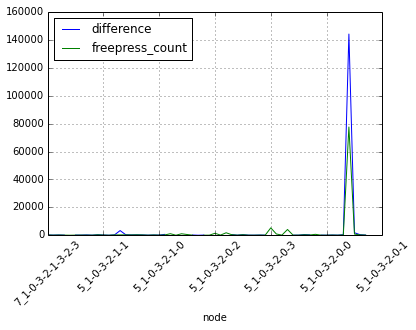

In [308]:
ax = df_w_freepress_w_blank[['difference','freepress_count']].plot()
ax.set_xticklabels(df.index.values, rotation=45)

# How many more clusters if we changed jump thresh to 0.1?

In [216]:
rejected_threshes = pd.read_clipboard(header=None)

In [220]:
rejected_threshes.describe()

,0
count,210.000000
mean,-0.023788
std,0.096910
min,-0.306106
25%,-0.041306
50%,0.004047
75%,0.023226
max,0.242446


In [221]:
rejected_threshes[rejected_threshes[0] > 0.10]

,0
70,0.108141
72,0.203375
169,0.233653
170,0.242446
171,0.240810
173,0.238536
195,0.104543
196,0.105841


In [224]:
es.indices.delete(index="fcc_comments_part_two")

{u'acknowledged': True}

In [226]:
es.cat.indices()

u'green fcc_test_2 1 0 103 0 626.4kb 626.4kb \n'

# Answering questions

In [521]:
search_node_phrase('6_1-0-1-1-0-0-1','I strongly support')

19

In [534]:
[(n, search_node_phrase(n, "mcchesney")) for n in df.index]

[(u'7_1-0-3-2-1-3-2-3', 0),
 (u'5_1-0-3-2-1-1', 0),
 (u'5_1-0-3-2-1-0', 0),
 (u'5_1-0-3-2-0-2', 0),
 (u'5_1-0-3-2-0-3', 0),
 (u'5_1-0-3-2-0-0', 0),
 (u'5_1-0-3-2-0-1', 0),
 (u'3_1-0-1-3', 0),
 (u'6_1-0-3-2-1-2-3', 0),
 (u'6_1-0-3-2-1-2-2', 0),
 (u'6_1-0-3-2-1-2-1', 0),
 (u'6_1-0-3-2-1-2-0', 0),
 (u'4_1-0-3-2-3', 0),
 (u'0_0', 1),
 (u'3_1-0-1-0', 1),
 (u'6_1-0-3-2-1-3-3', 0),
 (u'6_1-0-3-2-1-3-0', 0),
 (u'6_1-0-3-2-1-3-1', 0),
 (u'7_1-0-3-2-1-3-2-0', 0),
 (u'7_1-0-3-2-1-3-2-2', 0),
 (u'4_1-0-3-3-0', 1),
 (u'3_1-0-1-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-0', 0),
 (u'9_1-0-3-2-1-3-2-1-3-1', 0),
 (u'9_1-0-3-2-1-3-2-1-3-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-3', 0),
 (u'5_1-0-1-1-2-1', 0),
 (u'5_1-0-1-1-2-0', 0),
 (u'5_1-0-1-1-2-3', 0),
 (u'5_1-0-1-1-2-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-4', 0),
 (u'1_1-3', 32242),
 (u'1_1-2', 0),
 (u'1_1-1', 1),
 (u'8_1-0-3-2-1-3-2-1-2', 0),
 (u'8_1-0-3-2-1-3-2-1-1', 1),
 (u'8_1-0-3-2-1-3-2-1-0', 0),
 (u'3_1-0-3-1', 0),
 (u'2_1-0-0', 5),
 (u'2_1-0-2', 1),
 (u'6_1-0-1-1-0-0-

## How often are phrases mentioned?

In [104]:
def any_phrase_query(phrases, nodes=None):
    qbody = {"query": {"bool": {"should":[]}}}
    if nodes:
        qbody['query']['bool']['must'] = []
        for node in nodes:
            qbody['query']['bool']['must'].append({"match": {"clusters": node}})
    for phrase in phrases:
        qbody['query']['bool']['should'].append({"match_phrase": {"text": phrase}})
    return qbody

def multi_phrase_query(phrases, node=None):
    qbody = {"query": {"bool": {"must":[]}}}
    if nodes:
        qbody['query']['bool']['must'].append({"match": {"clusters": node}})
    for phrase in phrases:
        qbody['query']['bool']['must'].append({"match_phrase": {"text": phrase}})
    return qbody

def search_node_any_phrase(n, ps):
    res = es.search(index='fcc_comments_part_two', body=any_phrase_query(ps,n))
    return res['hits']['total']

def search_node_multi_phrase(n, ps):
    res = es.search(index='fcc_comments_part_two', body=multi_phrase_query(ps,n))
    return res['hits']['total']

## "title ii", "public utility", "common carrier"

In [309]:
ps = ["title ii", "public utility", "common carrier"]
results = [(n, search_node_any_phrase([n,], ps)) for n in df.index]

In [310]:
results

[(u'7_1-0-3-2-1-3-2-3', 32512),
 (u'5_1-0-3-2-1-1', 32566),
 (u'5_1-0-3-2-1-0', 32591),
 (u'5_1-0-3-2-0-2', 10308),
 (u'5_1-0-3-2-0-3', 20),
 (u'5_1-0-3-2-0-0', 22269),
 (u'5_1-0-3-2-0-1', 10292),
 (u'3_1-0-1-3', 20588),
 (u'6_1-0-3-2-1-2-3', 10322),
 (u'6_1-0-3-2-1-2-2', 22460),
 (u'6_1-0-3-2-1-2-1', 32533),
 (u'6_1-0-3-2-1-2-0', 10262),
 (u'4_1-0-3-2-3', 32661),
 (u'0_0', 274942),
 (u'3_1-0-1-0', 10937),
 (u'6_1-0-3-2-1-3-3', 32666),
 (u'6_1-0-3-2-1-3-0', 32576),
 (u'6_1-0-3-2-1-3-1', 32611),
 (u'7_1-0-3-2-1-3-2-0', 32407),
 (u'7_1-0-3-2-1-3-2-2', 32559),
 (u'4_1-0-3-3-0', 32108),
 (u'3_1-0-1-2', 26012),
 (u'9_1-0-3-2-1-3-2-1-3-0', 1347),
 (u'9_1-0-3-2-1-3-2-1-3-1', 1593),
 (u'9_1-0-3-2-1-3-2-1-3-2', 1151),
 (u'9_1-0-3-2-1-3-2-1-3-3', 720),
 (u'5_1-0-1-1-2-1', 20396),
 (u'5_1-0-1-1-2-0', 16137),
 (u'5_1-0-1-1-2-3', 4317),
 (u'5_1-0-1-1-2-2', 820),
 (u'9_1-0-3-2-1-3-2-1-3-4', 1730),
 (u'1_1-3', 32353),
 (u'1_1-2', 75370),
 (u'1_1-1', 32834),
 (u'8_1-0-3-2-1-3-2-1-2', 22418),
 (u'8_1-0

In [311]:
search_node_any_phrase(None, ps)

643375

In [524]:
results = [(n, search_node_phrase(n, "net neutrality, the principle that")) for n in df.index]

In [525]:
results

[(u'7_1-0-3-2-1-3-2-3', 0),
 (u'5_1-0-3-2-1-1', 0),
 (u'5_1-0-3-2-1-0', 0),
 (u'5_1-0-3-2-0-2', 0),
 (u'5_1-0-3-2-0-3', 0),
 (u'5_1-0-3-2-0-0', 0),
 (u'5_1-0-3-2-0-1', 0),
 (u'3_1-0-1-3', 0),
 (u'6_1-0-3-2-1-2-3', 0),
 (u'6_1-0-3-2-1-2-2', 0),
 (u'6_1-0-3-2-1-2-1', 0),
 (u'6_1-0-3-2-1-2-0', 0),
 (u'4_1-0-3-2-3', 0),
 (u'0_0', 0),
 (u'3_1-0-1-0', 0),
 (u'6_1-0-3-2-1-3-3', 0),
 (u'6_1-0-3-2-1-3-0', 0),
 (u'6_1-0-3-2-1-3-1', 0),
 (u'7_1-0-3-2-1-3-2-0', 0),
 (u'7_1-0-3-2-1-3-2-2', 0),
 (u'4_1-0-3-3-0', 0),
 (u'3_1-0-1-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-0', 0),
 (u'9_1-0-3-2-1-3-2-1-3-1', 0),
 (u'9_1-0-3-2-1-3-2-1-3-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-3', 0),
 (u'5_1-0-1-1-2-1', 0),
 (u'5_1-0-1-1-2-0', 0),
 (u'5_1-0-1-1-2-3', 0),
 (u'5_1-0-1-1-2-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-4', 0),
 (u'1_1-3', 0),
 (u'1_1-2', 0),
 (u'1_1-1', 0),
 (u'8_1-0-3-2-1-3-2-1-2', 0),
 (u'8_1-0-3-2-1-3-2-1-1', 0),
 (u'8_1-0-3-2-1-3-2-1-0', 0),
 (u'3_1-0-3-1', 0),
 (u'2_1-0-0', 0),
 (u'2_1-0-2', 0),
 (u'6_1-0-1-1-0-0-4', 

In [314]:
#es.indices.delete('fcc_comments_part_one')

In [313]:
res = es.search(index='fcc_comments_part_one', body=any_phrase_query(ps,None))
res['hits']['total']

NotFoundError: TransportError(404, u'IndexMissingException[[fcc_comments_part_one] missing]')

In [100]:
326916 / 797500.

0.40992601880877744

In [107]:
643375 / 1674385.

0.3842455588171179

## "Sen. Leahy"

In [312]:
search_node_any_phrase(None, ["Sen. Leahy",])

37

In [119]:
es.search(index="fcc_comments_part_two", body=any_phrase_query(["Sen. Leahy",]))

{u'_shards': {u'failed': 0, u'successful': 1, u'total': 1},
 u'hits': {u'hits': [{u'_id': u'02-153-001111',
    u'_index': u'fcc_comments_part_two',
    u'_score': 2.3196936,
    u'_source': {u'applicant': u'Chuck Rockey',
     u'clusters': [u'3_1-0-1-1',
      u'2_1-0-1',
      u'6_1-0-1-1-0-0-1',
      u'4_1-0-1-1-0',
      u'5_1-0-1-1-0-0'],
     u'dateRcpt': u'2014-09-16T00:00:00+00:00',
     u'email_subject': u'Please, hold public hearings on 14-28',
     u'id': u'02-153-001111',
     u'tagged': u"To|TO|to Chairman|NP|chairman Tom|NP|tom Wheeler|NP|wheeler and|CC|and the|DT|the FCC|NP|fcc To|TO|to the|DT|the FCC|NP|fcc --|:|-- I|PP|i 'm|VBP|be writing|VVG|write to|TO|to urge|VV|urge you|PP|you to|TO|to hold|VV|hold public|JJ|public hearings|NNS|hearing on|IN|on net|JJ|net neutrality|NN|neutrality .|SENT|. As|IN|as Sen.|NP|sen. Leahy|NP|leahy and|CC|and Rep.|NP|rep. Matsui|NP|matsui stated|VVD|state in|IN|in their|PP$|their joint|JJ|joint release|NN|release ,|,|, the|DT|the America

## Dates and clusters

### Date counts within given cluster

In [315]:
len(nodelist)

58

In [316]:
len(df_w_freepress_w_blank.index)

58

In [317]:
set(nodelist) - set(df_w_freepress_w_blank.index)

set()

In [517]:
def get_daily_counts(cluster_id):
    result = es.search(index='fcc_comments_part_two', body={'query': 
                                               {'match': 
                                                {'clusters': cluster_id}},
                                               'size': 0,
                                               'aggs': { 
                                                "group_by_date": {
                                                "terms": 
                                                 {"size": 0, "field": "dateRcpt"}}}})
    date_df = pd.DataFrame(result['aggregations']['group_by_date']['buckets'])
    date_df.columns = [cluster_id, 'key', 'key_as_string']
    date_df['rcptDate'] = date_df.key_as_string.map(lambda x: np.datetime64(x))
    date_df.set_index('rcptDate', inplace=True)
    return date_df[[cluster_id,]].resample('d', how='sum')

def get_hourly_counts(cluster_id):
    result = es.search(index='fcc_comments_part_two', body={'query': 
                                               {'match': 
                                                {'clusters': cluster_id}},
                                               'size': 0,
                                               'aggs': { 
                                                "group_by_date": {
                                                "terms": 
                                                 {"size": 0, "field": "dateRcpt"}}}})
    date_df = pd.DataFrame(result['aggregations']['group_by_date']['buckets'])
    date_df.columns = [cluster_id, 'key', 'key_as_string']
    date_df['rcptDate'] = date_df.key_as_string.map(lambda x: np.datetime64(x))
    date_df.set_index('rcptDate', inplace=True)
    return date_df[[cluster_id,]].resample('h', how='sum')

In [319]:
cluster_timelines = pd.DataFrame.join(get_daily_counts(nodelist[0]),
                                      [get_daily_counts(cid) for cid in nodelist[1:]],
                                      how='outer')

In [526]:
cluster_hour_timelines = pd.DataFrame.join(get_hourly_counts(nodelist[0]),
                                      [get_hourly_counts(cid) for cid in nodelist[1:]],
                                      how='outer')

In [321]:
cluster_timelines.index.summary()

u'DatetimeIndex: 190 entries, 2014-03-11 00:00:00 to 2014-09-16 00:00:00\nFreq: D'

In [527]:
cluster_hour_timelines.index.summary()

u'DatetimeIndex: 4537 entries, 2014-03-11 00:00:00 to 2014-09-16 00:00:00\nFreq: H'

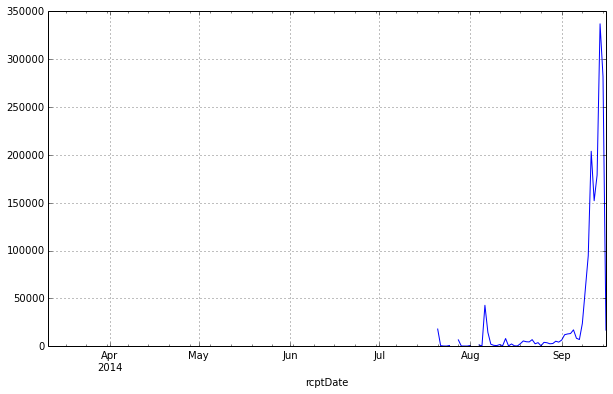

In [325]:
cluster_timelines.sum(axis=1).plot(figsize=(10,6))

In [563]:
def plot_cluster_timelines(ct, cluster_index=None):
    if cluster_index != None:
        tmp = ct.ix[:,list(cluster_index)]
    else:
        tmp = ct
    
    fig_length = len(cluster_index) * 3
    fig_width = len(tmp.index) * 1
    
    fig, axes = plt.subplots(nrows=len(tmp.columns), ncols=1, sharey=True, figsize=(20,fig_length))
    
    for i, colname in enumerate(tmp.columns):
        tmp[colname].plot(ax=axes[i], kind='line')
        axes[i].set_title(colname)
    
    fig.autofmt_xdate()
    
def plot_hourlycluster_timelines(ct, cluster_index=None):
    if cluster_index != None:
        tmp = ct.ix[:,list(cluster_index)]
    else:
        tmp = ct[:]
    
    fig_length = len(cluster_index) * 5
    fig_width = len(tmp.index) * 1
    
    fig, axes = plt.subplots(nrows=len(tmp.columns), ncols=1, sharey=True, figsize=(20,fig_length))
    
    for i, colname in enumerate(tmp.columns):
        tmp[colname].plot(ax=axes[i], kind='bar')
        axes[i].set_title(colname)
    
    fig.autofmt_xdate()

In [335]:
pd.datetime(2014,8,1)

datetime.datetime(2014, 8, 1, 0, 0)

In [346]:
df_w_freepress_w_blank[df_w_freepress_w_blank.keyphrase.isnull()].index

Index([u'5_1-0-3-2-0-3', u'9_1-0-3-2-1-3-2-1-3-0', u'9_1-0-3-2-1-3-2-1-3-2', u'9_1-0-3-2-1-3-2-1-3-3', u'5_1-0-1-1-2-2', u'9_1-0-3-2-1-3-2-1-3-4', u'1_1-2', u'6_1-0-1-1-0-0-4', u'6_1-0-1-1-0-0-0', u'6_1-0-1-1-0-0-3', u'5_1-0-3-2-2-0'], dtype='object')

In [348]:
no_keyphrase = df_w_freepress_w_blank[df_w_freepress_w_blank.keyphrase.isnull()].index

In [349]:
type(no_keyphrase)

pandas.core.index.Index

In [350]:
cluster_timelines.ix[:,no_keyphrase].sum()

node
5_1-0-3-2-0-3               20
9_1-0-3-2-1-3-2-1-3-0     1347
9_1-0-3-2-1-3-2-1-3-2     1151
9_1-0-3-2-1-3-2-1-3-3      720
5_1-0-1-1-2-2              820
9_1-0-3-2-1-3-2-1-3-4     1730
1_1-2                    75370
6_1-0-1-1-0-0-4           7350
6_1-0-1-1-0-0-0            703
6_1-0-1-1-0-0-3           6989
5_1-0-3-2-2-0              764
dtype: float64

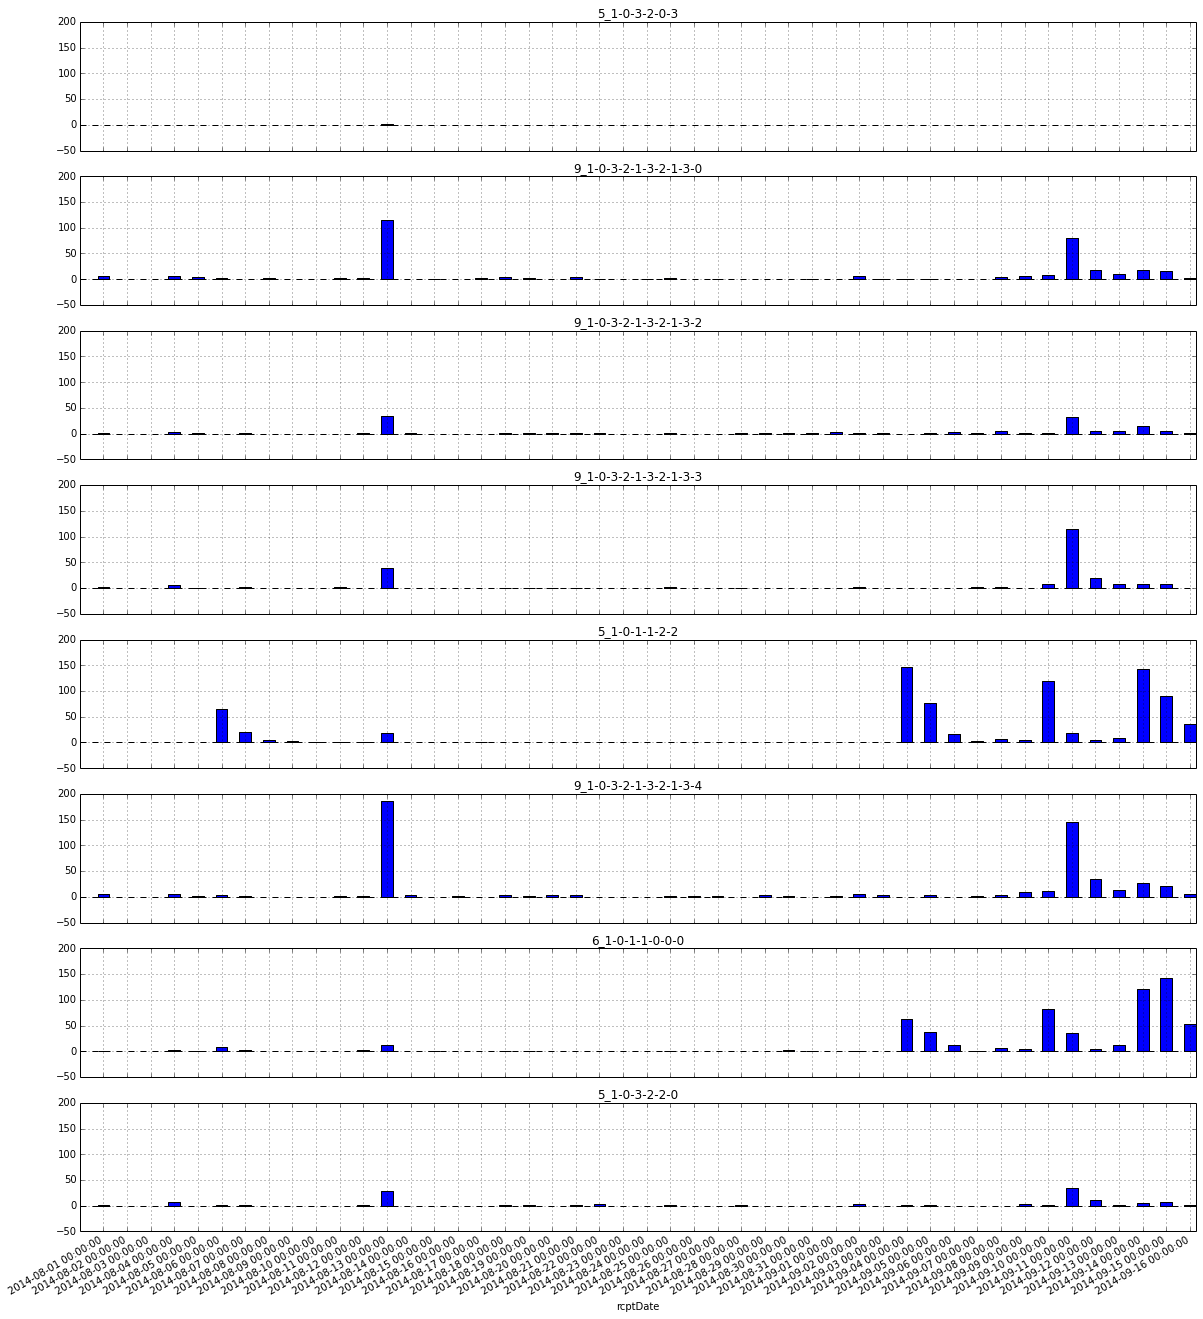

In [404]:
plot_cluster_timelines(cluster_timelines, no_keyphrase.drop(['1_1-2',
                                                             '6_1-0-1-1-0-0-4',
                                                             '6_1-0-1-1-0-0-3',
                                                             ]))

### count of date by cluster

## American commitment issues

In [406]:
ac_docs = list(pd.read_clipboard(header=None)[0])

In [407]:
ac_docs

['1_1-1',
 '1_1-3',
 '2_1-0-0',
 '2_1-0-2',
 '3_1-0-3-0',
 '3_1-0-3-1',
 '4_1-0-3-2-3',
 '4_1-0-3-3-0',
 '4_1-0-3-3-1',
 '4_1-0-3-3-2',
 '4_1-0-3-3-3',
 '5_1-0-3-2-0-0',
 '5_1-0-3-2-0-1',
 '5_1-0-3-2-0-2',
 '5_1-0-3-2-1-0',
 '5_1-0-3-2-1-1',
 '5_1-0-3-2-2-1',
 '5_1-0-3-2-2-3',
 '6_1-0-3-2-1-2-0',
 '6_1-0-3-2-1-2-1',
 '6_1-0-3-2-1-2-2',
 '6_1-0-3-2-1-2-3',
 '6_1-0-3-2-1-3-1',
 '6_1-0-3-2-1-3-3',
 '7_1-0-3-2-1-3-2-0',
 '7_1-0-3-2-1-3-2-2',
 '7_1-0-3-2-1-3-2-3',
 '8_1-0-3-2-1-3-2-1-0',
 '8_1-0-3-2-1-3-2-1-1',
 '8_1-0-3-2-1-3-2-1-2']

### timeline

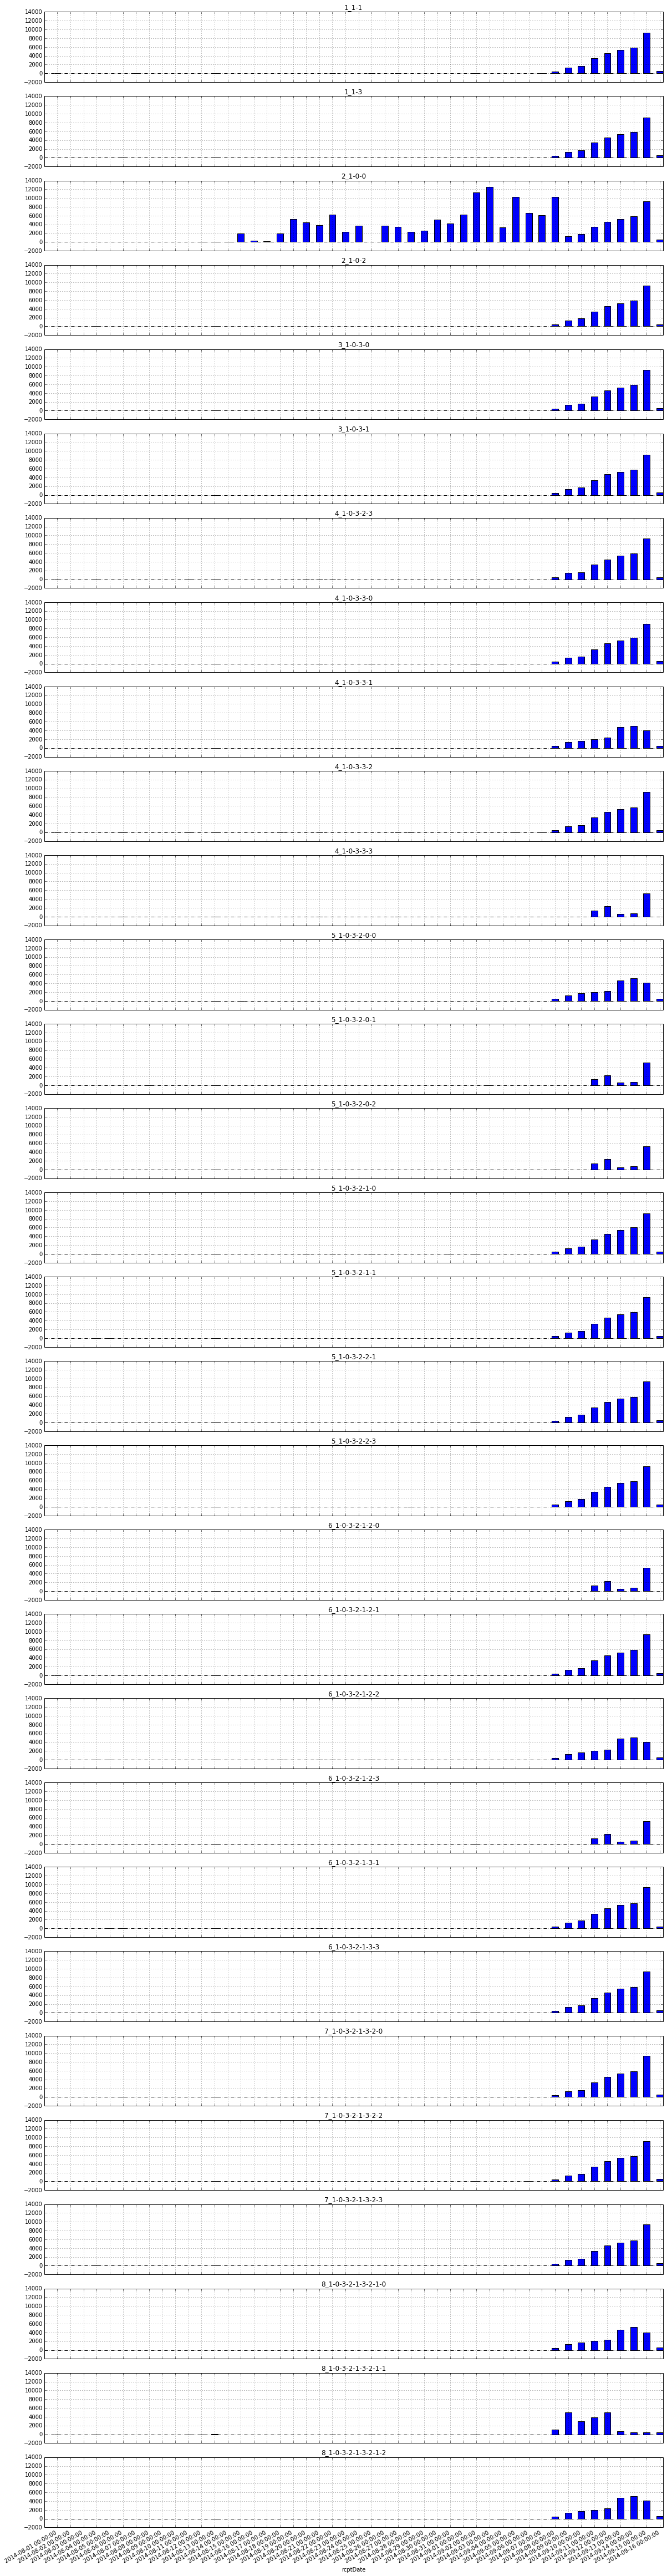

In [408]:
plot_cluster_timelines(cluster_timelines, ac_docs)

In [536]:
blog_viz_clusters = ["1_1-3",
                     "2_1-0-0",
                     "7_1-0-3-2-1-3-2-3",
                     "6_1-0-3-2-1-3-0",
                     "6_1-0-3-2-1-3-3",
                     ]

In [559]:
def make_sparkline_url(args, maxy, width=200,height=50):
    url = "https://chart.googleapis.com/chart?"
    url += '&'.join([
        "chs={w}x{h}".format(w=width, h=height),
        "cht=ls",
        "chxr=0,0,30|1,0,{}".format(maxy),
        "chco=0077CC",
        "chd=t:{}".format(','.join([str(int(a)) for a in args]))])
    return url

In [560]:
tmp.max().max()

12538.0

In [561]:
tmp = cluster_timelines.ix[pd.datetime(2014,8,15):pd.datetime(2014,9,15),blog_viz_clusters]

maxy = int(tmp.max().max())

for col in blog_viz_clusters:
    print make_sparkline_url(list(tmp.fillna(0)[col].values), maxy)
    

https://chart.googleapis.com/chart?chs=200x50&cht=ls&chxr=0,0,30|1,0,12538&chco=0077CC&chd=t:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,440,1306,1626,3425,4649,5371,5794,9111
https://chart.googleapis.com/chart?chs=200x50&cht=ls&chxr=0,0,30|1,0,12538&chco=0077CC&chd=t:1994,281,187,1960,5275,4482,3879,6194,2373,3653,0,3776,3444,2355,2580,5126,4187,6289,11294,12538,3328,10274,6600,6175,10335,1326,1760,3466,4612,5267,5864,9294
https://chart.googleapis.com/chart?chs=200x50&cht=ls&chxr=0,0,30|1,0,12538&chco=0077CC&chd=t:0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,484,1279,1637,3307,4667,5299,5784,9359
https://chart.googleapis.com/chart?chs=200x50&cht=ls&chxr=0,0,30|1,0,12538&chco=0077CC&chd=t:0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,454,1328,1692,3316,4599,5224,5930,9227
https://chart.googleapis.com/chart?chs=200x50&cht=ls&chxr=0,0,30|1,0,12538&chco=0077CC&chd=t:0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,418,1351,1666,3295,4634,5450,5802,9339


In [578]:
def plot_cluster_timelines_line(ct, cluster_index=None):    
    if cluster_index != None:
        tmp = ct.ix[:,list(cluster_index)]
    else:
        tmp = ct
    
    fig_length = len(cluster_index) * 3
    fig_width = len(tmp.index) * 1
    
    fig, axes = plt.subplots(nrows=len(tmp.columns),
                             ncols=1,
                             sharey=True,
                             figsize=(20,fig_length),
                             )
    
    for i, colname in enumerate(tmp.columns):
        tmp[colname].plot(ax=axes[i], kind='line')
        axes[i].set_title(colname)
        axes[i].axis('off')
    
    fig.autofmt_xdate()

In [579]:
fig.savefig?

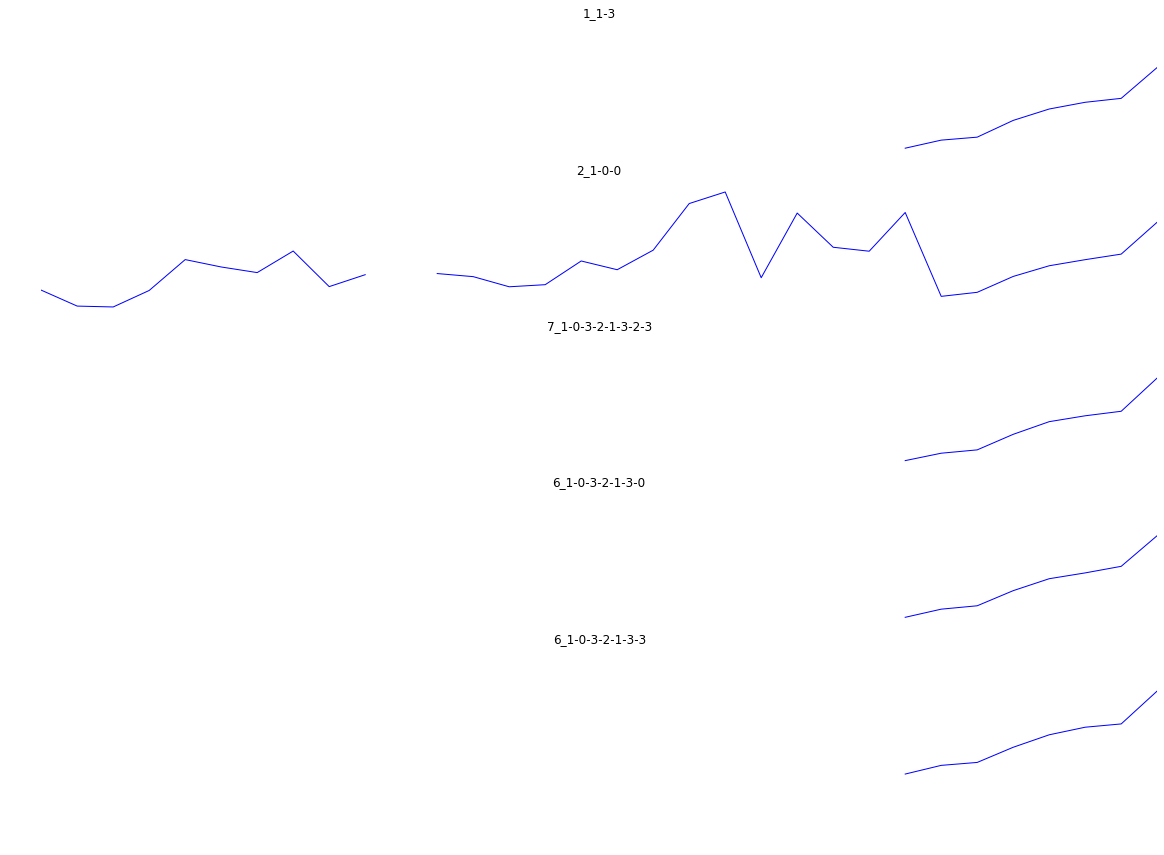

In [575]:
plot_cluster_timelines_line(cluster_timelines.ix[pd.datetime(2014,8,15):pd.datetime(2014,9,15)],
                       blog_viz_clusters)

In [576]:
cluster_timelines.ix[pd.datetime(2014,8,15):pd.datetime(2014,9,15),blog_viz_clusters].to_csv('../stats/blog_viz_sparklines.csv')

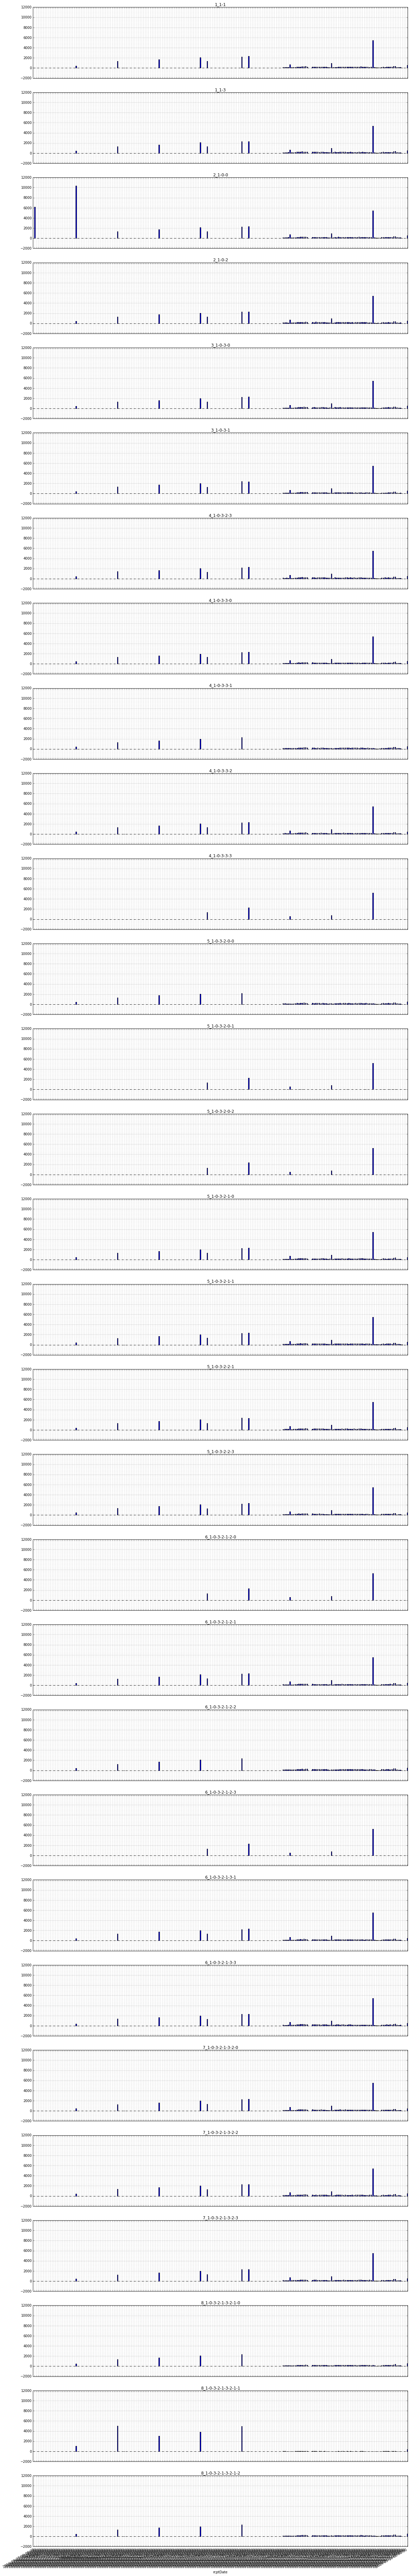

In [532]:
plot_hourlycluster_timelines(cluster_hour_timelines.ix[pd.datetime(2014,9,7):pd.datetime(2014,9,16),ac_docs], ac_docs)

In [418]:
cluster_timelines.ix[pd.datetime(2014,9,7):pd.datetime(2014,9,16),ac_docs].sum().sum()

813091.0

In [419]:
cluster_timelines.ix[pd.datetime(2014,1,1):pd.datetime(2014,9,6),ac_docs].sum().sum()

105914.0

### authorship

In [423]:
set(ac_docs) - set(tree_data.keys())

set()

In [440]:
m = re.findall(r'ggo', 'gobbledygoo or goo')

In [448]:
def find_applicant_and_zip(jdoc):
    applicant = jdoc['applicant']
    if applicant:
        split_by_name = jdoc['text'].split(applicant)
        if len(split_by_name) > 1:
            address_info = split_by_name[-1]
            zips = re.findall(r'[0-9]{5}', address_info)
            if len(zips) > 0:
                return (applicant, zips[-1])
        return (applicant, None)
    else:
        return (None, None)

In [462]:
applicant_zipcode_counts = defaultdict(lambda: defaultdict(int))

for cluster_id in ac_docs:
    sys.stderr.write(cluster_id)
    sys.stderr.write('\n')
    sys.stderr.flush()
    for doc_id in tree_data[cluster_id]:
        jdoc = requests.get('http://monsterthree:8080/data/{d}.json'.format(d=doc_id)).json()
        applicant, zipcode = find_applicant_and_zip(jdoc)
        #print applicant, zipcode
        if applicant and zipcode:
            applicant_zipcode_counts[cluster_id][(applicant, zipcode)] += 1

1_1-1


KeyboardInterrupt: 

In [459]:
pd.DataFrame(applicant_zipcode_counts['6_1-0-3-2-1-2-1'].items())

,0,1
0,"(Alfonso Guerra, 92057)",1
1,"(Alicia Marshall, 02780)",1
2,"(Aimee Grissom, 74865)",1
3,"(Aliyah Wilson, 70115)",1
4,"(Alana Lindauer, 24540)",1
5,"(Adam Ingraham, 48875)",1
6,"(albert guzman, 92345)",1
7,"(Adriana Fregoso, 85757)",1
8,"(Alison Mitola, 11731)",1


In [ ]:
def author_query(nodes):
    qbody = {"query": {"bool": {"must":[]}}}
    if nodes:
        qbody['query']['bool']['must'].append({"match": {"clusters": node}})
    qbody['query']['bool']['must'].append({"regexp": {"text": phrase}})
    return qbody

In [ ]:
result = es.search(index='fcc_comments_part_two', body=
                                   {"query": 
                                    {"filtered":
                                     {"filter": 
                                      {"not":
                                       {"script": 
                                        {"script": "blank_field",
                                         "params" : {"field_name" : "applicant"}}}}}},
                                "size": 0,
                                   "aggs":
                                       {"group_by_cluster": 
                                           {"terms":
                                                {"field": "clusters", "size": 0}}}})

In [469]:
p = "I am a strong supporter"
results = [(n, search_node_phrase(n, p)) for n in df.index]

In [470]:
results

[(u'7_1-0-3-2-1-3-2-3', 0),
 (u'5_1-0-3-2-1-1', 0),
 (u'5_1-0-3-2-1-0', 0),
 (u'5_1-0-3-2-0-2', 0),
 (u'5_1-0-3-2-0-3', 0),
 (u'5_1-0-3-2-0-0', 0),
 (u'5_1-0-3-2-0-1', 0),
 (u'3_1-0-1-3', 0),
 (u'6_1-0-3-2-1-2-3', 0),
 (u'6_1-0-3-2-1-2-2', 0),
 (u'6_1-0-3-2-1-2-1', 0),
 (u'6_1-0-3-2-1-2-0', 0),
 (u'4_1-0-3-2-3', 0),
 (u'0_0', 0),
 (u'3_1-0-1-0', 0),
 (u'6_1-0-3-2-1-3-3', 0),
 (u'6_1-0-3-2-1-3-0', 0),
 (u'6_1-0-3-2-1-3-1', 0),
 (u'7_1-0-3-2-1-3-2-0', 0),
 (u'7_1-0-3-2-1-3-2-2', 0),
 (u'4_1-0-3-3-0', 0),
 (u'3_1-0-1-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-0', 0),
 (u'9_1-0-3-2-1-3-2-1-3-1', 0),
 (u'9_1-0-3-2-1-3-2-1-3-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-3', 0),
 (u'5_1-0-1-1-2-1', 0),
 (u'5_1-0-1-1-2-0', 0),
 (u'5_1-0-1-1-2-3', 0),
 (u'5_1-0-1-1-2-2', 0),
 (u'9_1-0-3-2-1-3-2-1-3-4', 0),
 (u'1_1-3', 0),
 (u'1_1-2', 1),
 (u'1_1-1', 0),
 (u'8_1-0-3-2-1-3-2-1-2', 0),
 (u'8_1-0-3-2-1-3-2-1-1', 0),
 (u'8_1-0-3-2-1-3-2-1-0', 0),
 (u'3_1-0-3-1', 0),
 (u'2_1-0-0', 0),
 (u'2_1-0-2', 0),
 (u'6_1-0-1-1-0-0-4', 

## Daily Kos

In [477]:
kos_clusters = ['3_1-0-1-3','5_1-0-1-1-2-0','5_1-0-1-1-2-3','5_1-0-1-1-0-2']

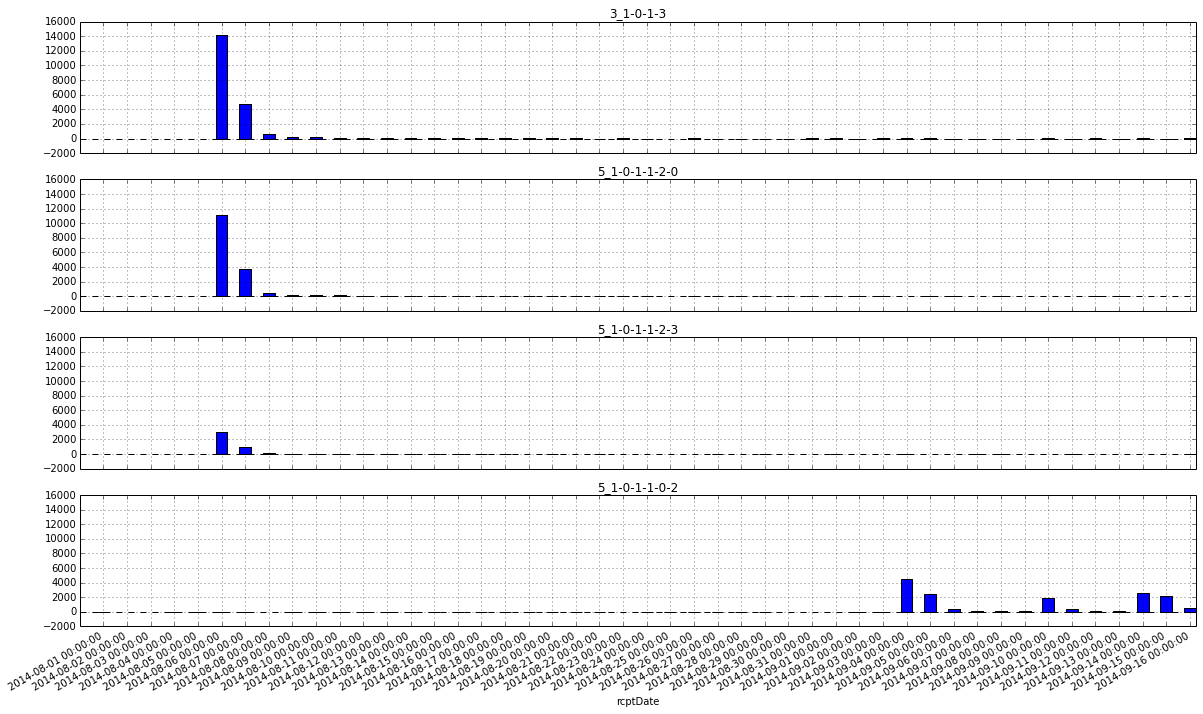

In [478]:
plot_cluster_timelines(cluster_timelines, kos_clusters)

In [479]:
cluster_timelines[kos_clusters].sum()

3_1-0-1-3        20588
5_1-0-1-1-2-0    16137
5_1-0-1-1-2-3     4317
5_1-0-1-1-0-2    16791
dtype: float64

In [476]:
16137 + 4317

20454

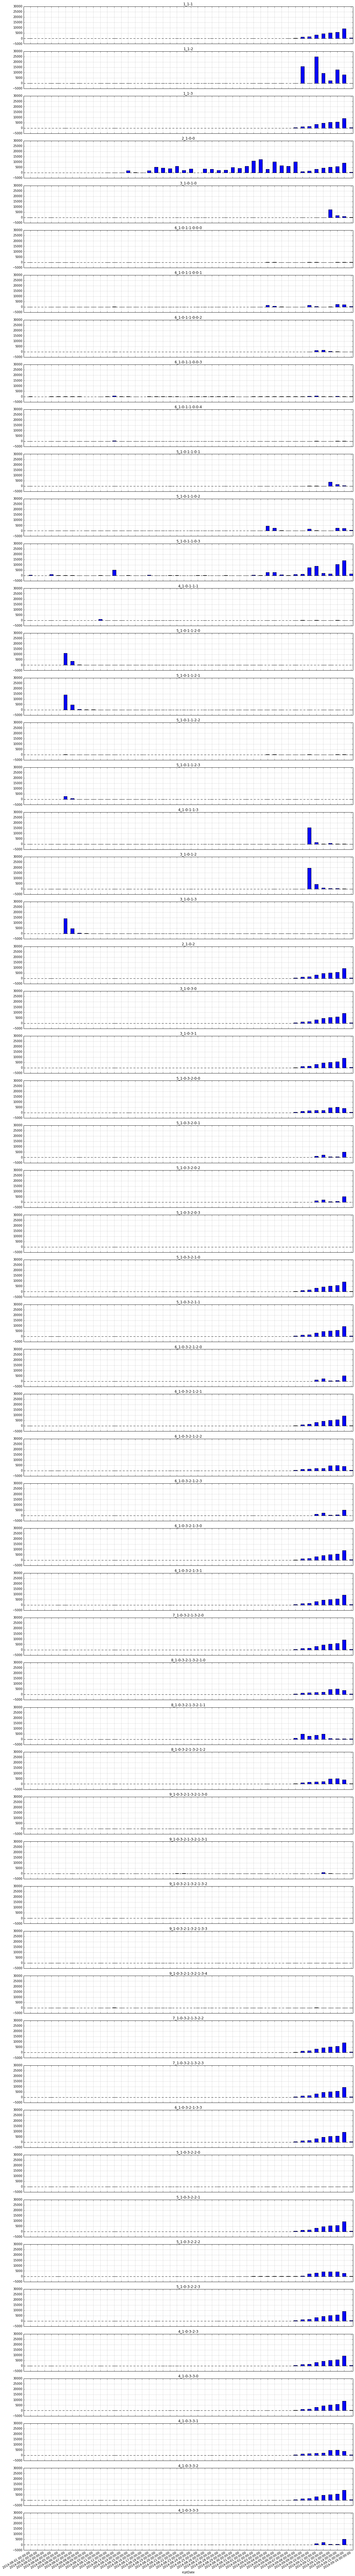

In [485]:
plot_cluster_timelines(cluster_timelines, [cluster_timelines.drop('0_0', axis=1).columns])s

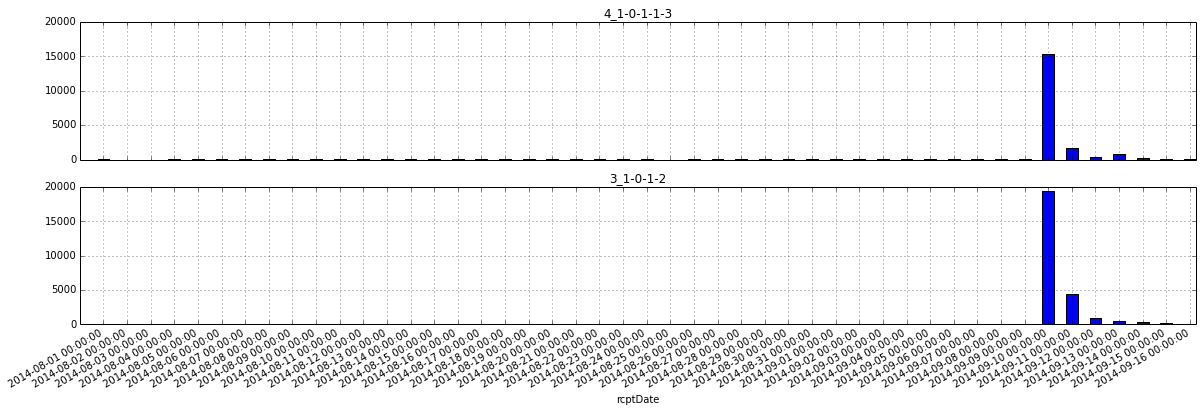

In [486]:
plot_cluster_timelines(cluster_timelines, ['4_1-0-1-1-3', '3_1-0-1-2'])

## Non-form comments

In [493]:
unmarked_idx = df_w_freepress_w_blank[(df_w_freepress_w_blank['pct_difference'] > 0.50) | (df_w_freepress_w_blank['keyphrase'].isnull())].index
df.ix[unmarked_idx]

,node_count,keyphrase_count,keyphrase,level,node_id,difference,pct_difference
node,,,,,,,
5_1-0-3-2-0-3,20,NaN,NaN,NaN,NaN,NaN,0.000000
9_1-0-3-2-1-3-2-1-3-0,1347,NaN,NaN,NaN,NaN,NaN,0.000000
9_1-0-3-2-1-3-2-1-3-2,1151,NaN,NaN,NaN,NaN,NaN,0.000000
9_1-0-3-2-1-3-2-1-3-3,720,NaN,NaN,NaN,NaN,NaN,0.000000
5_1-0-1-1-2-2,820,NaN,NaN,NaN,NaN,NaN,0.000000
9_1-0-3-2-1-3-2-1-3-4,1730,NaN,NaN,NaN,NaN,NaN,0.000000
1_1-2,75370,NaN,NaN,NaN,NaN,NaN,0.000000
6_1-0-1-1-0-0-4,7350,NaN,NaN,NaN,NaN,NaN,0.000000
6_1-0-1-1-0-0-1,12366,5,"I urge you to schedule large, open public fiel...",6,1-0-1-1-0-0-1,12361,0.999596


In [490]:
unmarked = list(df_w_freepress_w_blank[(df_w_freepress_w_blank['pct_difference'] > 0.50) | (df_w_freepress_w_blank['keyphrase'].isnull())].index)

In [491]:
unmarked

[u'5_1-0-3-2-0-3',
 u'9_1-0-3-2-1-3-2-1-3-0',
 u'9_1-0-3-2-1-3-2-1-3-2',
 u'9_1-0-3-2-1-3-2-1-3-3',
 u'5_1-0-1-1-2-2',
 u'9_1-0-3-2-1-3-2-1-3-4',
 u'1_1-2',
 u'6_1-0-1-1-0-0-4',
 u'6_1-0-1-1-0-0-1',
 u'6_1-0-1-1-0-0-0',
 u'6_1-0-1-1-0-0-3',
 u'5_1-0-3-2-2-0',
 u'5_1-0-1-1-0-3']

In [494]:
df.ix[unmarked_idx]['node_count'].sum()

253902

In [495]:
253902 * 0.10

25390.2

In [511]:
sample = itertools.chain(*(random.sample(tree_data[cluster_id], int((len(tree_data[cluster_id]) / 20.))) for cluster_id in unmarked))

In [513]:
with open('../stats/sampling_non_form.txt','w') as fout:
    for doc_id in sample:
        fout.write(doc_id+'\n')

In [515]:
!wc -l ../stats/sampling_non_form.txt

12691 ../stats/sampling_non_form.txt


In [516]:
!head ../stats/sampling_non_form.txt

6018211044-774
6018210841-12253
6018211039-10619
6018211039-11153
6018210827-1520
02-055-000996
6018261174-1333
6018210841-9305
6018210827-2681
6018211170-8238


In [580]:
[k for k,v in tree_data.items() if '6018211039-7101' in v]

[u'3_1-0-1-1', u'2_1-0-1', u'4_1-0-1-1-0', u'5_1-0-1-1-0-3']

In [18]:
es.search(index='fcc_comments_part_two', body={'query':{'match_phrase': {'text': 'NSA'}}})

{u'_shards': {u'failed': 0, u'successful': 1, u'total': 1},
 u'hits': {u'hits': [{u'_id': u'6018211044-2074',
    u'_index': u'fcc_comments_part_two',
    u'_score': 5.357918,
    u'_source': {u'applicant': u'Free Press',
     u'author': u'Nico',
     u'brief': False,
     u'city': u'Brigantine',
     u'clusters': [u'3_1-0-1-1', u'2_1-0-1', u'4_1-0-1-1-0', u'5_1-0-1-1-0-3'],
     u'dateRcpt': u'2014-07-18T04:00:00Z',
     u'disseminated': u'2014-07-21T12:04:27.183Z',
     u'exParte': False,
     u'fileNumber': None,
     u'id': u'6018211044-2074',
     u'lawfirm': None,
     u'modified': u'2014-07-21T17:54:56.303Z',
     u'pages': 1172,
     u'preprocessed': True,
     u'proceeding': u'14-28',
     u'regFlexAnalysis': False,
     u'smallBusinessImpact': False,
     u'stateCd': u'NJ',
     u'submissionType': u'COMMENT',
     u'tagged': u'fuck|VV|fuck you|PP|you nsa|VV|nsa',
     u'text': u'fuck you nsa',
     u'viewingStatus': u'Unrestricted',
     u'zip': u'01062'},
    u'_type': u'com

In [ ]:
es.